In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Verileri yükleme
train_data = pd.read_csv('cure_the_princess_train.csv')
val_data = pd.read_csv('cure_the_princess_validation.csv')
test_data = pd.read_csv('cure_the_princess_test.csv')

In [2]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.inputs = torch.tensor(data.drop(['Cured'], axis=1).values, dtype=torch.float32)
        self.targets = torch.tensor(data['Cured'].values, dtype=torch.long)
        
    def __getitem__(self, index):
        return self.inputs[index], self.targets[index]
    
    def __len__(self):
        return len(self.targets)

# Verileri PyTorch tensor'larına dönüştürme
train_dataset = MyDataset(train_data)
val_dataset = MyDataset(val_data)
test_dataset = MyDataset(test_data)

# DataLoader'lar oluşturma
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(13, 100)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(100, 50)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(50, 13)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
    
model = MLP()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [5]:
# Training loop
for epoch in range(300):
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets.long())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    # Validation loop
    val_loss = 0.0
    for inputs, targets in val_loader:
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, targets.long())
            val_loss += loss.item()
            
    print(f"Epoch {epoch+1}, Training loss: {running_loss/len(train_loader)}, Validation loss: {val_loss/len(val_loader)}")

Epoch 1, Training loss: 2.4811701593519766, Validation loss: 2.4609866619110106
Epoch 2, Training loss: 2.423218331759489, Validation loss: 2.392147386074066
Epoch 3, Training loss: 2.3386508241484436, Validation loss: 2.298159956932068
Epoch 4, Training loss: 2.2354200339015526, Validation loss: 2.1996725678443907
Epoch 5, Training loss: 2.150075363207467, Validation loss: 2.123836803436279
Epoch 6, Training loss: 2.0881277488756784, Validation loss: 2.072407913208008
Epoch 7, Training loss: 2.0455709801444524, Validation loss: 2.0362123012542725
Epoch 8, Training loss: 2.0147084495689294, Validation loss: 2.008660686016083
Epoch 9, Training loss: 1.9903386106973961, Validation loss: 1.9867189288139344
Epoch 10, Training loss: 1.9712108916874174, Validation loss: 1.9684844732284545
Epoch 11, Training loss: 1.9550296490705465, Validation loss: 1.9530123472213745
Epoch 12, Training loss: 1.940562198433695, Validation loss: 1.9397538423538208
Epoch 13, Training loss: 1.9288352863698066, 

In [6]:
# Test loop
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f"Test accuracy: {100 * correct/total}%")

Test accuracy: 59.4559585492228%


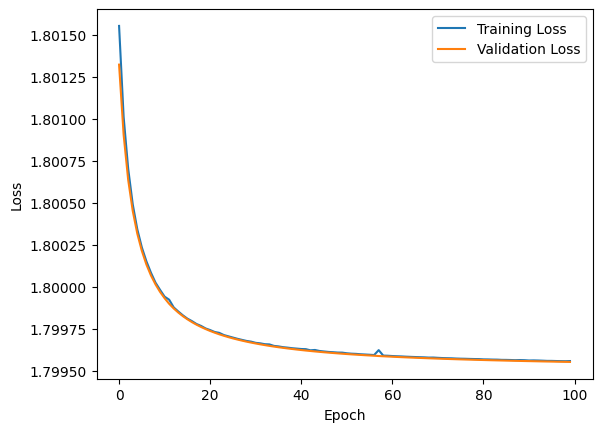

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Seed değerini ayarlayalım
torch.manual_seed(190401033)



# Loss fonksiyonunu ve optimizer'ı tanımlayalım
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim ve validasyon için epoch sayısını belirleyelim
num_epochs = 100

# Eğitim ve validasyon loss'larını kaydedelim
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Eğitim için loss hesaplayalım
    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validasyon için loss hesaplayalım
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

# Loss grafiğini çizdirelim
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Test accuracy hesapla
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    test_acc = 100 * correct / total
    print('Test accuracy: {:.2f}%'.format(test_acc))

Test accuracy: 59.72%
